<a href="https://colab.research.google.com/github/lageniaestela/12demayo/blob/master/modeladodecasaconpuntosyplanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gtts

In [1]:

!pip install tensorflow matplotlib numpy

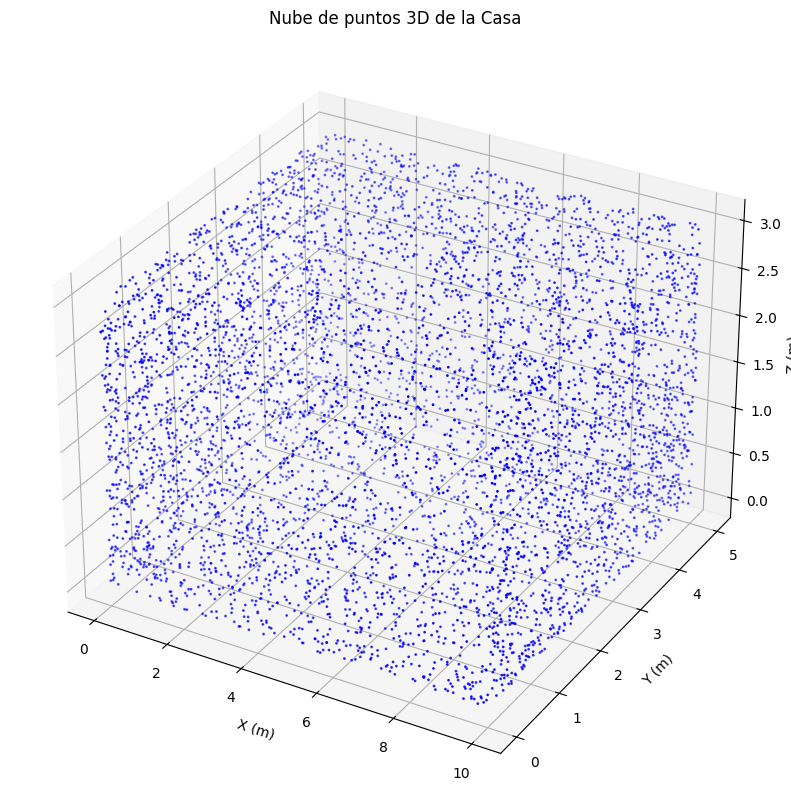

In [2]:
# Instalar librerías si es necesario
# !pip install tensorflow matplotlib numpy

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dimensiones de la casa
L, W, H = 10, 5, 3  # largo, ancho, altura
n_points = 1000     # cantidad de puntos por superficie

# Función para generar puntos en un plano
def generar_puntos_plano(axis, value, size, limits1, limits2):
    coords1 = np.random.uniform(limits1[0], limits1[1], size)
    coords2 = np.random.uniform(limits2[0], limits2[1], size)
    fixed = np.full(size, value)
    if axis == 'x':
        return np.stack([fixed, coords1, coords2], axis=1)
    elif axis == 'y':
        return np.stack([coords1, fixed, coords2], axis=1)
    else:  # 'z'
        return np.stack([coords1, coords2, fixed], axis=1)

# Generar nubes de puntos
piso = generar_puntos_plano('z', 0, n_points, (0, L), (0, W))
techo = generar_puntos_plano('z', H, n_points, (0, L), (0, W))
pared_izquierda = generar_puntos_plano('x', 0, n_points, (0, W), (0, H))
pared_derecha = generar_puntos_plano('x', L, n_points, (0, W), (0, H))
pared_fondo = generar_puntos_plano('y', 0, n_points, (0, L), (0, H))
pared_frente = generar_puntos_plano('y', W, n_points, (0, L), (0, H))

# Concatenar todos los puntos
todos_los_puntos = np.vstack([piso, techo, pared_izquierda, pared_derecha, pared_fondo, pared_frente])

# Convertir a TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices(todos_los_puntos)

# Visualizar
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(todos_los_puntos[:,0], todos_los_puntos[:,1], todos_los_puntos[:,2], s=1, c='blue')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Nube de puntos 3D de la Casa')
plt.show()


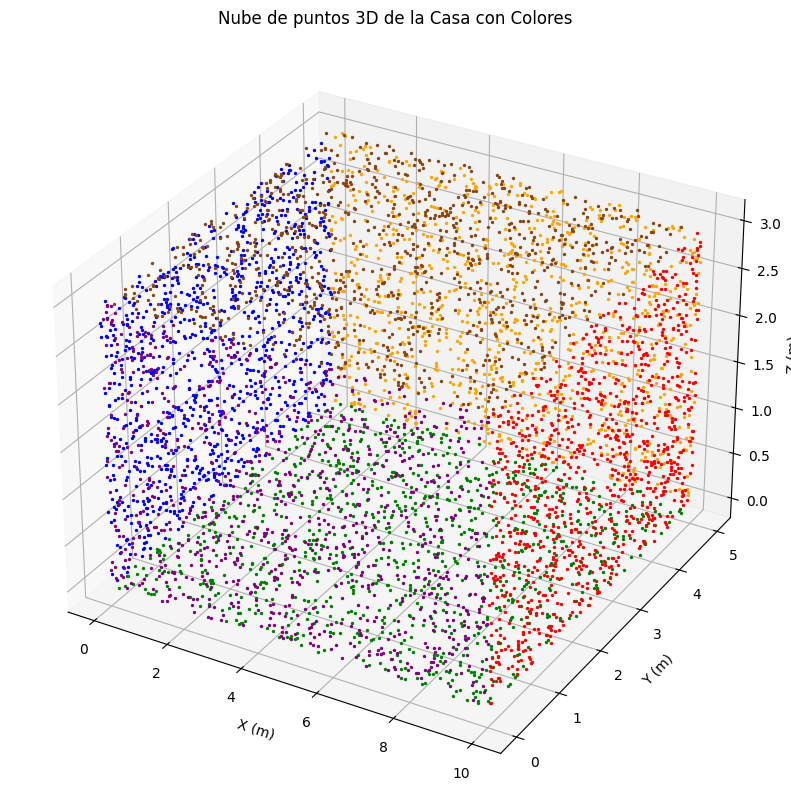

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dimensiones de la casa
L, W, H = 10, 5, 3  # largo, ancho, altura
n_points = 1000     # cantidad de puntos por superficie

# Función para generar puntos en un plano
def generar_puntos_plano(axis, value, size, limits1, limits2):
    coords1 = np.random.uniform(limits1[0], limits1[1], size)
    coords2 = np.random.uniform(limits2[0], limits2[1], size)
    fixed = np.full(size, value)
    if axis == 'x':
        return np.stack([fixed, coords1, coords2], axis=1)
    elif axis == 'y':
        return np.stack([coords1, fixed, coords2], axis=1)
    else:  # 'z'
        return np.stack([coords1, coords2, fixed], axis=1)

# Generar nubes de puntos
piso = generar_puntos_plano('z', 0, n_points, (0, L), (0, W))
techo = generar_puntos_plano('z', H, n_points, (0, L), (0, W))
pared_izquierda = generar_puntos_plano('x', 0, n_points, (0, W), (0, H))
pared_derecha = generar_puntos_plano('x', L, n_points, (0, W), (0, H))
pared_fondo = generar_puntos_plano('y', 0, n_points, (0, L), (0, H))
pared_frente = generar_puntos_plano('y', W, n_points, (0, L), (0, H))

# Concatenar puntos
todos_los_puntos = np.vstack([
    piso, techo, pared_izquierda, pared_derecha, pared_fondo, pared_frente
])

# Crear array de colores
colores = (
    ['green'] * len(piso) +
    ['saddlebrown'] * len(techo) +
    ['blue'] * len(pared_izquierda) +
    ['red'] * len(pared_derecha) +
    ['purple'] * len(pared_fondo) +
    ['orange'] * len(pared_frente)
)

# Convertir a TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices(todos_los_puntos)

# Visualizar con colores
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
for i, color in enumerate(colores):
    ax.scatter(todos_los_puntos[i,0], todos_los_puntos[i,1], todos_los_puntos[i,2], s=2, c=color)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Nube de puntos 3D de la Casa con Colores')
plt.show()


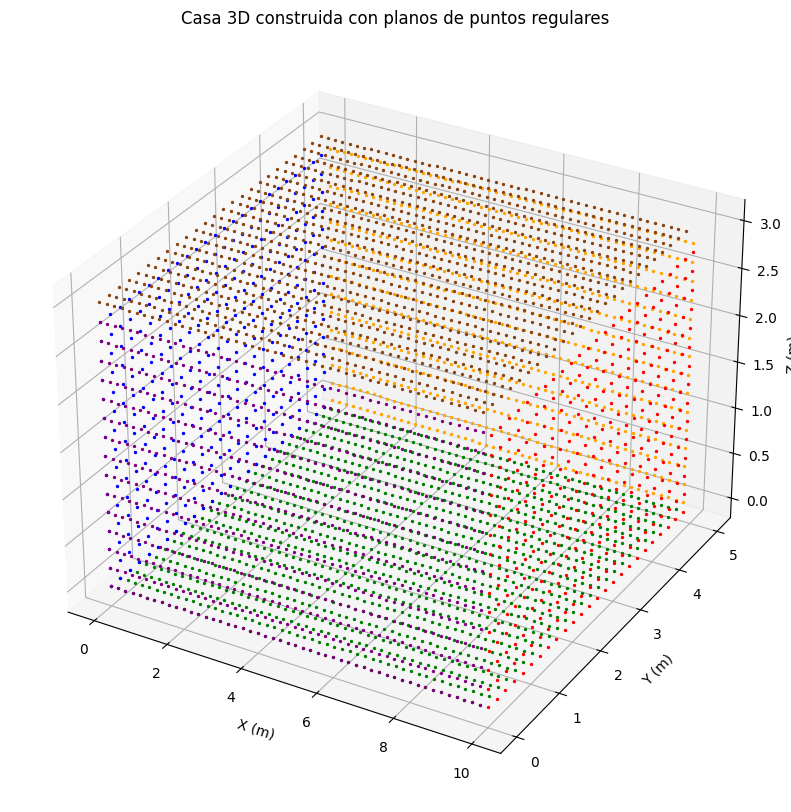

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dimensiones de la casa
L, W, H = 10, 5, 3  # largo, ancho, altura
step = 0.2          # distancia entre puntos (más chico = más denso)

# Función para crear malla de puntos en un plano
def crear_plano(axis, value, range1, range2, step):
    coords1 = np.arange(range1[0], range1[1], step)
    coords2 = np.arange(range2[0], range2[1], step)
    mesh1, mesh2 = np.meshgrid(coords1, coords2)
    fixed = np.full(mesh1.shape, value)
    if axis == 'x':
        return np.stack([fixed, mesh1, mesh2], axis=2).reshape(-1,3)
    elif axis == 'y':
        return np.stack([mesh1, fixed, mesh2], axis=2).reshape(-1,3)
    else:  # 'z'
        return np.stack([mesh1, mesh2, fixed], axis=2).reshape(-1,3)

# Crear cada plano
piso = crear_plano('z', 0, (0, L), (0, W), step)
techo = crear_plano('z', H, (0, L), (0, W), step)
pared_izquierda = crear_plano('x', 0, (0, W), (0, H), step)
pared_derecha = crear_plano('x', L, (0, W), (0, H), step)
pared_fondo = crear_plano('y', 0, (0, L), (0, H), step)
pared_frente = crear_plano('y', W, (0, L), (0, H), step)

# Concatenar todos los puntos
todos_los_puntos = np.vstack([
    piso, techo, pared_izquierda, pared_derecha, pared_fondo, pared_frente
])

# Crear colores por superficie
colores = (
    ['green'] * len(piso) +
    ['saddlebrown'] * len(techo) +
    ['blue'] * len(pared_izquierda) +
    ['red'] * len(pared_derecha) +
    ['purple'] * len(pared_fondo) +
    ['orange'] * len(pared_frente)
)

# Visualizar
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

for i, color in enumerate(colores):
    ax.scatter(todos_los_puntos[i,0], todos_los_puntos[i,1], todos_los_puntos[i,2], s=2, c=color)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Casa 3D construida con planos de puntos regulares')
plt.show()


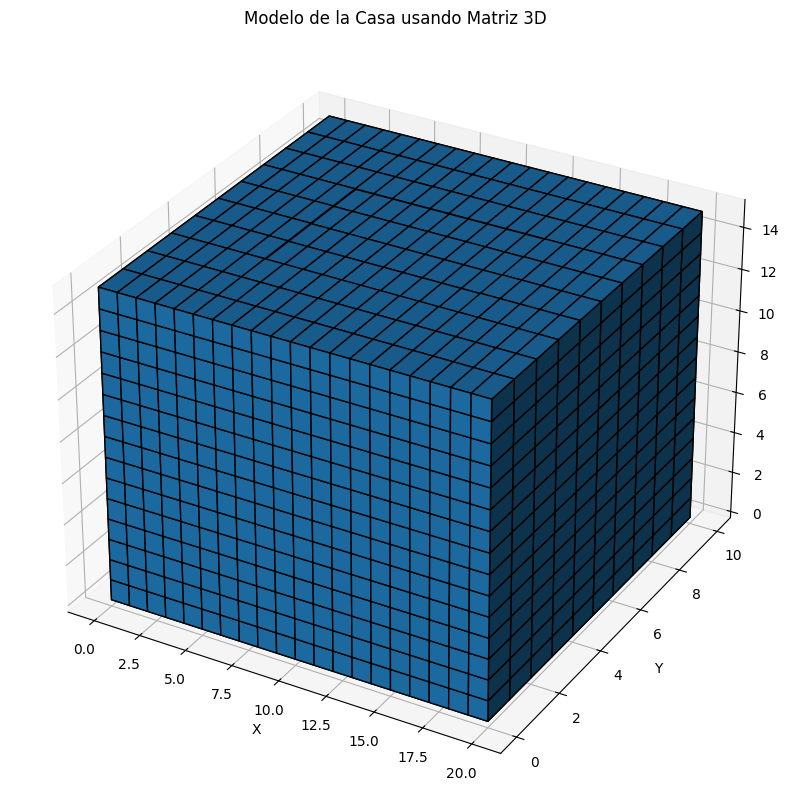

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dimensiones de la casa (simplificadas)
width = 20   # ancho (x)
depth = 10   # profundidad (y)
height = 15  # altura (z)

# Crear la matriz 3D vacía
M = np.zeros((width, depth, height))

# Definir estructuras
# Piso en el nivel z = 0
M[:, :, 0] = 1

# Techo en el nivel z = height-1
M[:, :, height-1] = 1

# Paredes perimetrales
M[0, :, :] = 1
M[width-1, :, :] = 1
M[:, 0, :] = 1
M[:, depth-1, :] = 1

# Agregar bloque elevado para eficiencia (segunda unidad elevada)
M[5:15, 3:7, 7:height-1] = 1

# Visualizar como voxels
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.voxels(M, edgecolor='k')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Modelo de la Casa usando Matriz 3D')
plt.show()


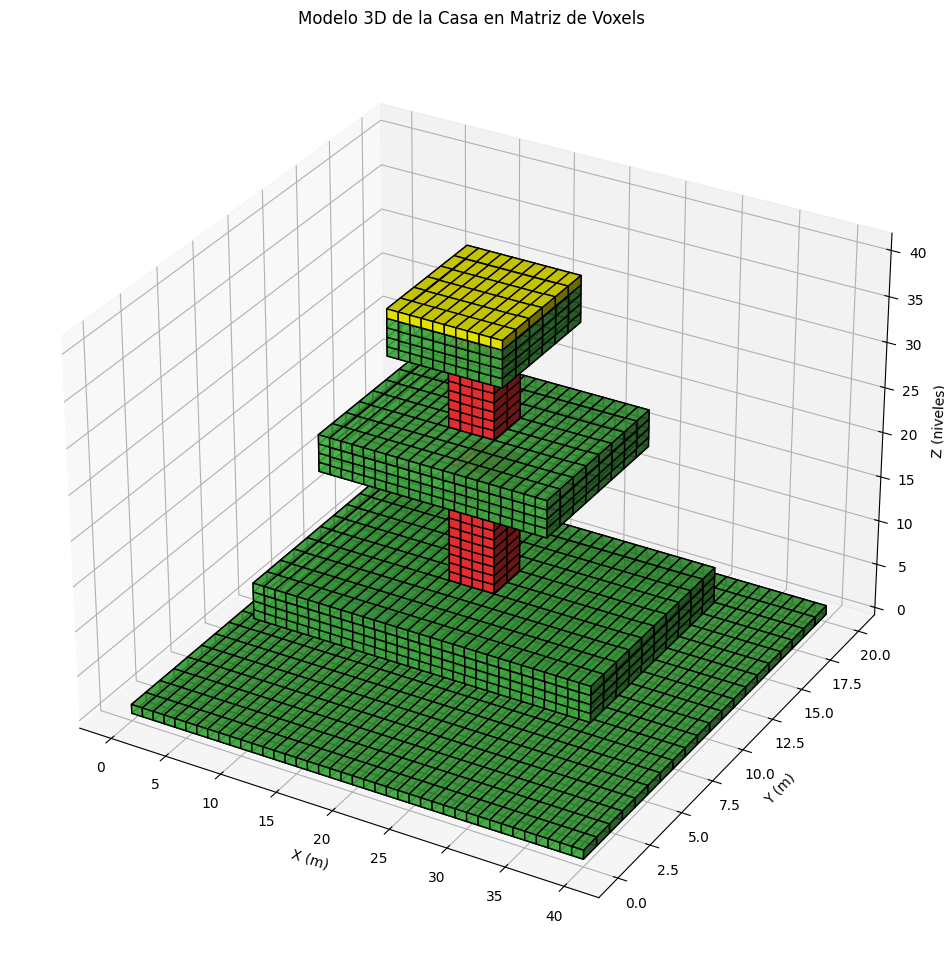

In [6]:
# Modelo Matemático de Casa en 3D usando Matriz de Voxels

import numpy as np
import matplotlib.pyplot as plt

# Definir dimensiones de la casa
# (Resolución de 0.25m por voxel)
dim_x = 40  # metros en eje X
dim_y = 20  # metros en eje Y
dim_z = 50  # altura en voxels

# Crear matriz 3D inicial llena de ceros (aire)
M = np.zeros((dim_x, dim_y, dim_z))

# --------------------
# Construcción de la estructura
# --------------------

# Piso (nivel terreno)
M[:,:,0] = 1  # todo el nivel z=0 es piso

# Primer Piso (Ground Level)
M[5:35, 5:15, 6:10] = 1

# Segundo Piso (nivel de habitaciones)
M[10:30, 6:14, 23:27] = 1

# Tercer Piso (lavadero y balcón)
M[15:25, 7:13, 36:40] = 1

# Paneles solares sobre el tercer piso
M[15:25, 7:13, 40] = 3

# Cisternas de agua debajo de la casa
M[8:12, 8:12, 1:3] = 4

# Chimenea solar (solar chimney)
M[18:22, 9:11, 10:40] = 5

# --------------------
# Visualización del modelo
# --------------------

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Condiciones para colores según materiales
facecolors = np.empty(M.shape + (4,), dtype=np.float32)

# Asignar colores
facecolors[M == 1] = [0.3, 0.8, 0.3, 0.8]   # verde para piso/paredes
facecolors[M == 3] = [1.0, 1.0, 0.0, 1.0]   # amarillo para paneles solares
facecolors[M == 4] = [0.2, 0.2, 1.0, 1.0]   # azul para cisternas
facecolors[M == 5] = [1.0, 0.2, 0.2, 1.0]   # rojo para chimenea solar
facecolors[M == 0] = [0.0, 0.0, 0.0, 0.0]   # transparente para aire

# Dibujar voxels
ax.voxels(M > 0, facecolors=facecolors, edgecolor='k')

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (niveles)')
ax.set_title('Modelo 3D de la Casa en Matriz de Voxels')
plt.show()

# --------------------
# Fin del modelo inicial
# --------------------

# Este es el primer modelo base.
# Luego podemos agregar puertas, ventanas, decks, jardín, etc.

# Opcional siguiente paso:
# - Simular optimización de paneles solares
# - Crear variantes automáticas de diseño
# - Entrenar un modelo de Machine Learning para mejorar el diseño


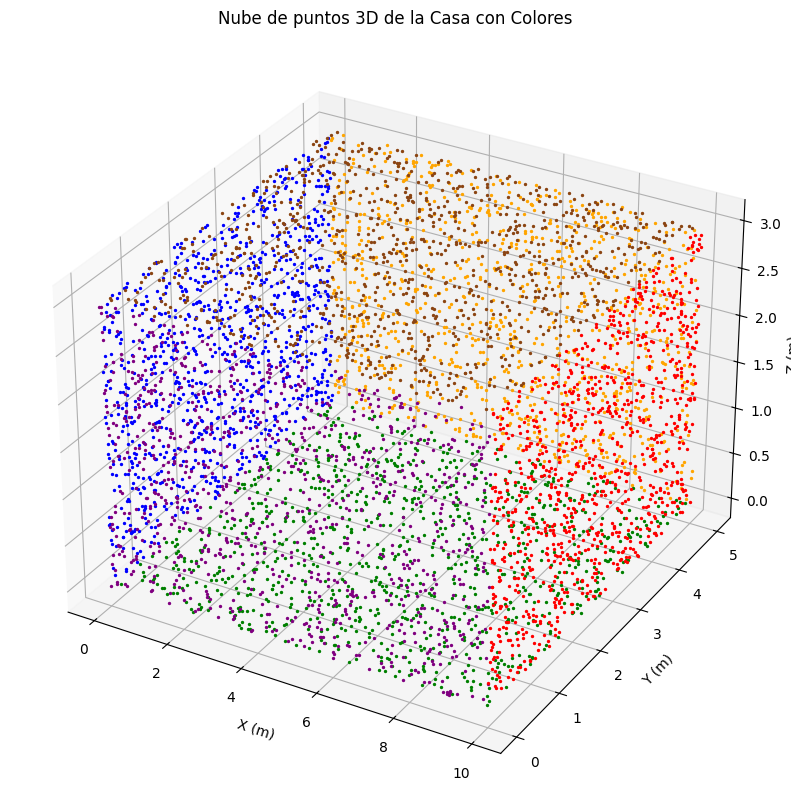

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Dimensiones de la casa
L, W, H = 10, 5, 3  # largo, ancho, altura
n_points = 1000     # cantidad de puntos por superficie

# Función para generar puntos en un plano
def generar_puntos_plano(axis, value, size, limits1, limits2):
    coords1 = np.random.uniform(limits1[0], limits1[1], size)
    coords2 = np.random.uniform(limits2[0], limits2[1], size)
    fixed = np.full(size, value)
    if axis == 'x':
        return np.stack([fixed, coords1, coords2], axis=1)
    elif axis == 'y':
        return np.stack([coords1, fixed, coords2], axis=1)
    else:  # 'z'
        return np.stack([coords1, coords2, fixed], axis=1)

# Generar nubes de puntos
piso = generar_puntos_plano('z', 0, n_points, (0, L), (0, W))
techo = generar_puntos_plano('z', H, n_points, (0, L), (0, W))
pared_izquierda = generar_puntos_plano('x', 0, n_points, (0, W), (0, H))
pared_derecha = generar_puntos_plano('x', L, n_points, (0, W), (0, H))
pared_fondo = generar_puntos_plano('y', 0, n_points, (0, L), (0, H))
pared_frente = generar_puntos_plano('y', W, n_points, (0, L), (0, H))

# Concatenar puntos
todos_los_puntos = np.vstack([piso, techo, pared_izquierda, pared_derecha, pared_fondo, pared_frente])

# Crear array de colores
colores = (['green'] * len(piso) +
           ['saddlebrown'] * len(techo) +
           ['blue'] * len(pared_izquierda) +
           ['red'] * len(pared_derecha) +
           ['purple'] * len(pared_fondo) +
           ['orange'] * len(pared_frente))

# Visualizar con colores
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# Optimización de la visualización: puntos más pequeños
for i, color in enumerate(colores):
    ax.scatter(todos_los_puntos[i, 0], todos_los_puntos[i, 1], todos_los_puntos[i, 2], s=2, c=color)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Nube de puntos 3D de la Casa con Colores')

# Mostrar la gráfica
plt.show()


In [8]:
import numpy as np
import plotly.graph_objects as go

# Dimensiones de la casa
L, W, H = 10, 5, 3  # largo, ancho, altura
n_points = 1000     # cantidad de puntos por superficie

# Función para generar puntos en un plano
def generar_puntos_plano(axis, value, size, limits1, limits2):
    coords1 = np.random.uniform(limits1[0], limits1[1], size)
    coords2 = np.random.uniform(limits2[0], limits2[1], size)
    fixed = np.full(size, value)
    if axis == 'x':
        return np.stack([fixed, coords1, coords2], axis=1)
    elif axis == 'y':
        return np.stack([coords1, fixed, coords2], axis=1)
    else:  # 'z'
        return np.stack([coords1, coords2, fixed], axis=1)

# Generar las superficies de la casa
piso = generar_puntos_plano('z', 0, n_points, (0, L), (0, W))
techo = generar_puntos_plano('z', H, n_points, (0, L), (0, W))
pared_izquierda = generar_puntos_plano('x', 0, n_points, (0, W), (0, H))
pared_derecha = generar_puntos_plano('x', L, n_points, (0, W), (0, H))
pared_fondo = generar_puntos_plano('y', 0, n_points, (0, L), (0, H))
pared_frente = generar_puntos_plano('y', W, n_points, (0, L), (0, H))

# Concatenar todos los puntos
todos_los_puntos = np.vstack([piso, techo, pared_izquierda, pared_derecha, pared_fondo, pared_frente])

# Crear las superficies con colores (cada cara de la casa tiene un color diferente)
fig = go.Figure()

# Función para agregar superficie a la figura con color
def agregar_superficie(puntos, color):
    fig.add_trace(go.Scatter3d(
        x=puntos[:, 0],
        y=puntos[:, 1],
        z=puntos[:, 2],
        mode='markers',
        marker=dict(size=3, color=color)
    ))

# Agregar las superficies
agregar_superficie(piso, 'green')
agregar_superficie(techo, 'saddlebrown')
agregar_superficie(pared_izquierda, 'blue')
agregar_superficie(pared_derecha, 'red')
agregar_superficie(pared_fondo, 'purple')
agregar_superficie(pared_frente, 'orange')

# Configuración de los ejes y visualización
fig.update_layout(
    scene=dict(
        xaxis=dict(title='X (m)', range=[0, L]),
        yaxis=dict(title='Y (m)', range=[0, W]),
        zaxis=dict(title='Z (m)', range=[0, H])
    ),
    title="Nube de puntos 3D de la Casa con Colores"
)

fig.show()


In [10]:
!pip install opencv-contrib-python


In [ ]:
!pip install numpy